# Q. Predicting turbine energy yield (TEY) using ambient variables as features.

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



- Attribute Information:

The explanations of sensor measurements and their brief statistics are given below:

Variable (Abbr.) Unit Min Max Mean

Ambient temperature (AT) C â€“6.23 37.10 17.71

Ambient pressure (AP) mbar 985.85 1036.56 1013.07

Ambient humidity (AH) (%) 24.08 100.20 77.87

Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93

Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56

Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43

Turbine after temperature (TAT) C 511.04 550.61 546.16

Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06

Turbine energy yield (TEY) MWH 100.02 179.50 133.51

Carbon monoxide (CO) mg/m3 0.00 44.10 2.37

Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

# Neural Networks

**Neural Networks**, also known as **Artificial Neural Networks (ANNs)** or **Simulated Neural Networks (SNNs)**, are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

**Artificial Neural Networks (ANNs)** are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.
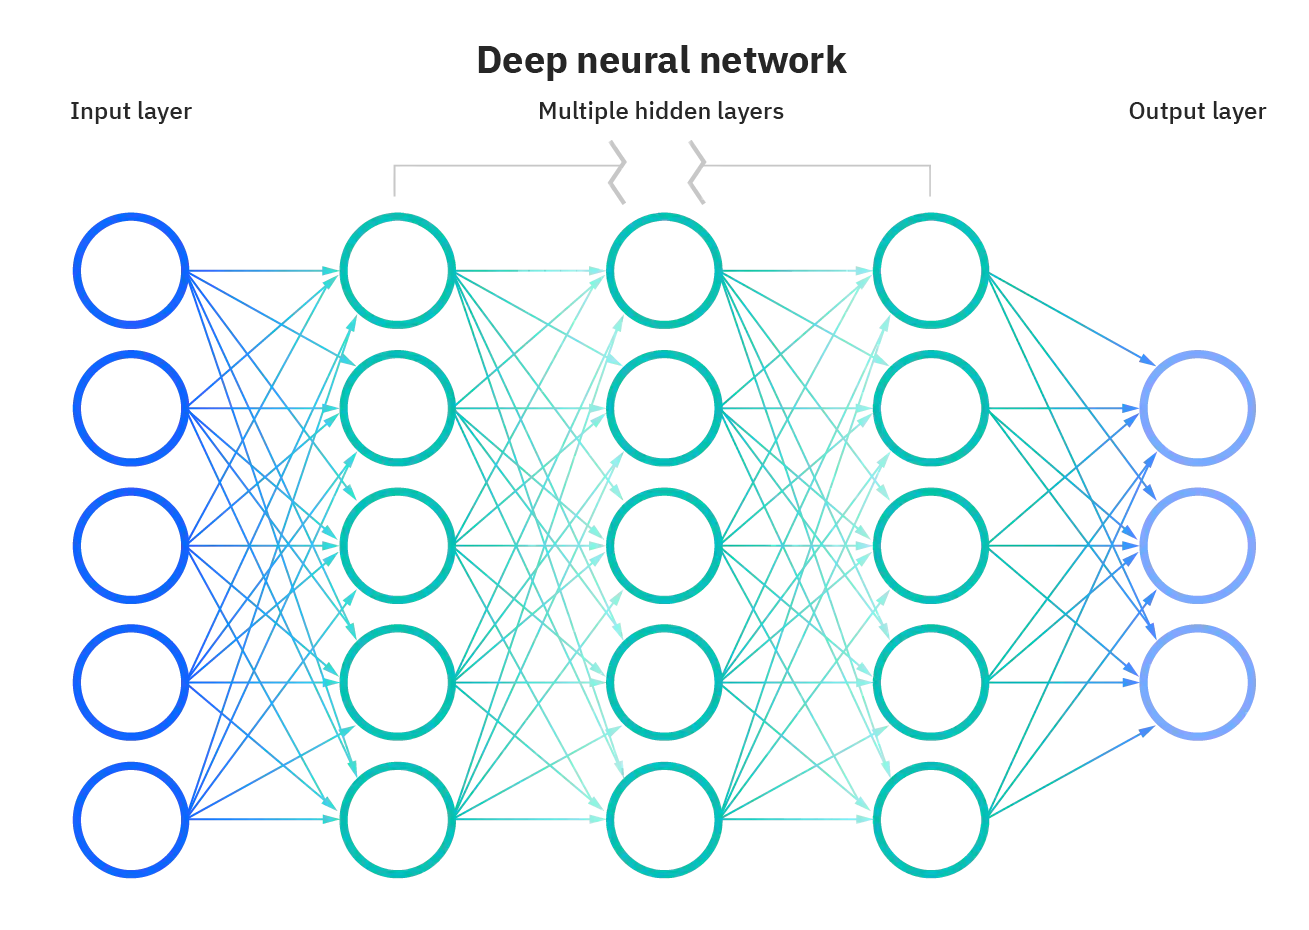

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
gas = pd.read_csv('gas_turbines.csv')

In [3]:
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


## Exploratory Data Analysis (EDA)

In [4]:
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
gas.tail()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227
15038,6.9279,1007.2,97.533,3.4275,19.306,1049.9,545.85,111.58,10.583,4.9816,92.498


In [6]:
#shape
gas.shape   

(15039, 11)

Dataset has `15039` rows and `11` columns

In [7]:
gas.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [8]:
#Creating copy of original dataset so if we made any changes it won't effect our original datset
gas_data = gas.copy()

In [9]:
gas_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [10]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


### Descriptive Stats

In [11]:
gas_data.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


- The features are not on the same scale. For example **AP has a mean of `1013.19`** and **CO has a mean value of `1.97`**. Features should be on the same scale for algorithms such as (gradient descent) to converge smoothly. Let's go ahead and check further.

In [12]:
gas_data.ndim

2

In [13]:
gas_data.axes

[RangeIndex(start=0, stop=15039, step=1),
 Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
        'NOX'],
       dtype='object')]

- **axes** is a function of the matplotlib library that adds axes to the current graph and makes it as current axes.

### Unique Values

In [14]:
gas_data.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [15]:
gas_data.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [16]:
new_data=pd.cut(gas_data['TEY'],bins=[0.0,140.0,180.0],labels=['Low','High'])
gas_data.insert(0,'new_TEY',new_data)

In [17]:
gas_data.head()

,new_TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,Low,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,Low,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,Low,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,Low,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,Low,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [18]:
#removing TEY columne as we wont requires it
gas_data=gas_data.drop(columns='TEY',axis=1,inplace=False)

In [19]:
gas_data=gas_data.rename({'new_TEY':'TEY'},axis=1)

In [20]:
gas_data[gas_data['TEY']=='High']

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
26,High,5.9958,1024.2,82.376,4.6570,28.128,1099.7,543.28,12.935,0.78039,82.101
28,High,7.9304,1023.7,76.271,4.6570,28.433,1096.2,540.40,13.055,1.12220,75.403
29,High,9.3818,1022.8,56.158,4.6340,28.221,1100.1,543.62,12.971,0.91143,83.766
30,High,10.0050,1022.4,55.943,4.5008,27.325,1100.3,547.24,12.813,0.99325,87.119
31,High,10.1970,1022.3,57.235,4.6544,28.375,1099.8,543.21,12.873,0.93630,80.353
...,...,...,...,...,...,...,...,...,...,...,...
14951,High,8.0589,1031.2,85.986,4.8726,30.035,1094.4,533.39,13.437,0.89657,69.412
14963,High,5.2822,1030.1,94.844,4.8530,29.311,1099.6,538.60,13.337,1.13450,75.627
14964,High,7.0311,1030.1,93.637,4.8118,29.298,1099.7,539.13,13.237,0.80091,74.359
14965,High,8.9323,1029.4,84.612,4.5057,27.478,1099.6,545.83,12.726,0.40559,77.507


## Data Visualization
### Exploded Pie Chart

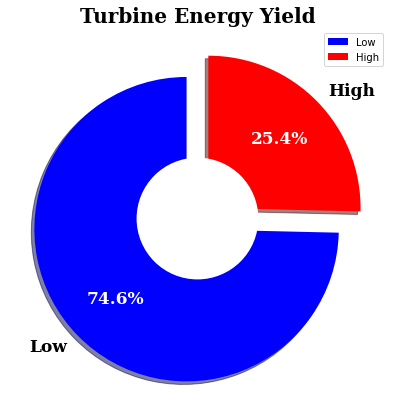

In [21]:
label_data=gas_data['TEY'].value_counts()

explode=(0.1,0.1)
plt.figure(figsize=(12,7))
patches, texts, pcts= plt.pie(label_data,labels=label_data.index,colors=['blue','red'],pctdistance=0.65,shadow=True,
                             startangle=90,explode=explode,autopct='%1.1f%%',
                             textprops={'fontsize':17,'color':'black','weight':'bold','family':'serif'})
plt.setp(pcts,color='white')
hfont={'weight':'bold','family':'serif'}
plt.title('Turbine Energy Yield',size=20,**hfont)

centre_circle=plt.Circle((0,0),0.40,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(['Low','High'],loc="upper right")
plt.show()

### Observations:
1. As we can see that the percentage of turbine energy yield, the **low average of energy production is high**
2. **Low energy yield** got percentage of **74.6%**
3. **High energy yield** got percentage of **25.4%**
4. Higher net energy yields and energy ratios correspond to better performance from an energy point of view
5. So, we can predict that there should be more High Turbine Energy Yields for better performance 

In [22]:
gas_data.columns

Index(['TEY', 'AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO',
       'NOX'],
      dtype='object')

### Boxplot
- For Independent Variables with Continuous values

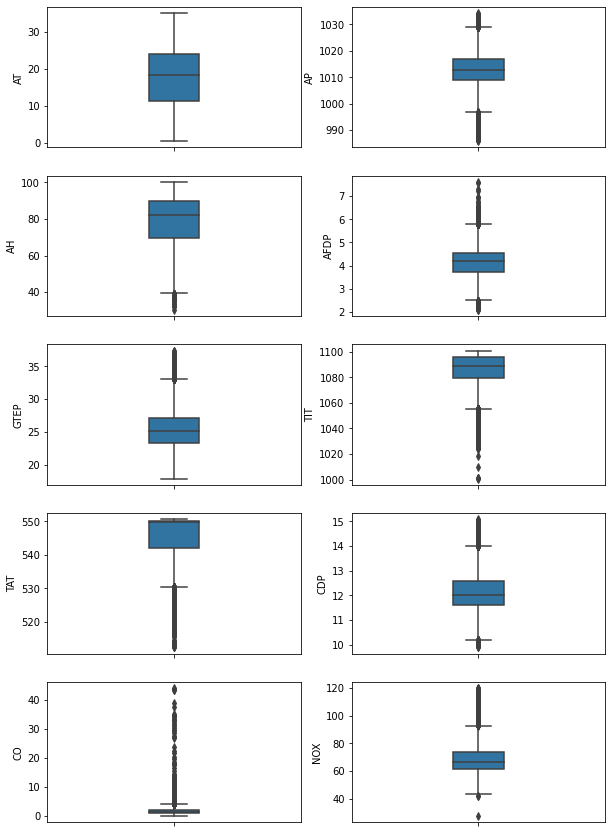

In [23]:
cols = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']
plt.figure(figsize=(10,15))

i=1
for col in cols:
    plt.subplot(5,2,i)
    sns.boxplot(y=col, data=gas_data,width=0.2)
    i+=1
plt.show()

### Observations:
1. The **Turbine Inlet Temperature (TIT) has the highest mean** all among the others
2. **Carbon monoxide (CO) has the lowest mean**
3. Except Ambient temperature (AT) all other contains outliers
4. Ambient temperature (AT) has large IQR range

### Histogram
- For indepent Variables with Continuous values

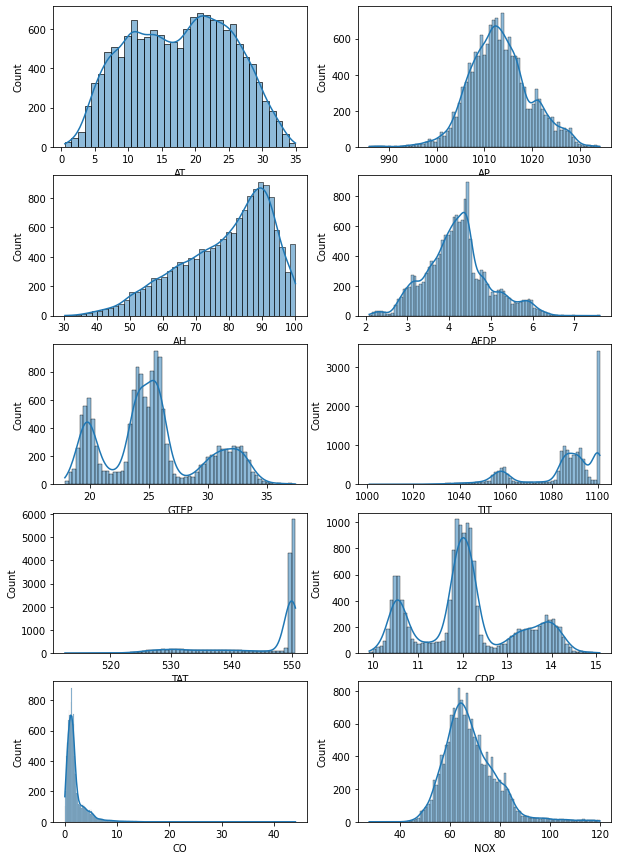

In [24]:
cols = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']
plt.figure(figsize=(10,15))

i=1
for col in cols:
    plt.subplot(5,2,i)
    sns.histplot(x=col, data=gas_data,kde=True)
    i+=1
plt.show()

### Observations:
1. Some of the features like **AT, AP are normally distributed**.
2. The features **AH, CO, TIT and TAT** exhibit the highest skew coefficients. Moreover, the distribution of **Carbon Mono Oxide (CO) and Turbine inlet temperature (TIT) and Turbine after temperature (TAT) seem to contain many outliers**.
3. The Ambient pressure (AP) and Nitrogen oxides (NOx) are showing the graph in normal distribution which means it is symmetric around the mean
4. Where as, **Ambient humidity (AH) is showing left skewed distribution** which means mode is greater than mean and median
5. **Carbon monoxide (CO) is showing right skewed distribution** which means mean is greater than mode and median
6. ANd, all the other features we don't see any common distribution among them

### Converting data from Categorical to Numerical

In [25]:
gas_data['TEY']=gas_data['TEY'].map({'High':0,'Low':1})

- In the dataset the `TEY` feature having the data in categorical.So, using map function we are converting it into numeric so the predication will ne fast and easier

In [26]:
gas_data.head()

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,1,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,1,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,1,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,1,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [27]:
gas_data.columns

Index(['TEY', 'AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO',
       'NOX'],
      dtype='object')

### Pair Plot
- To check Relationship

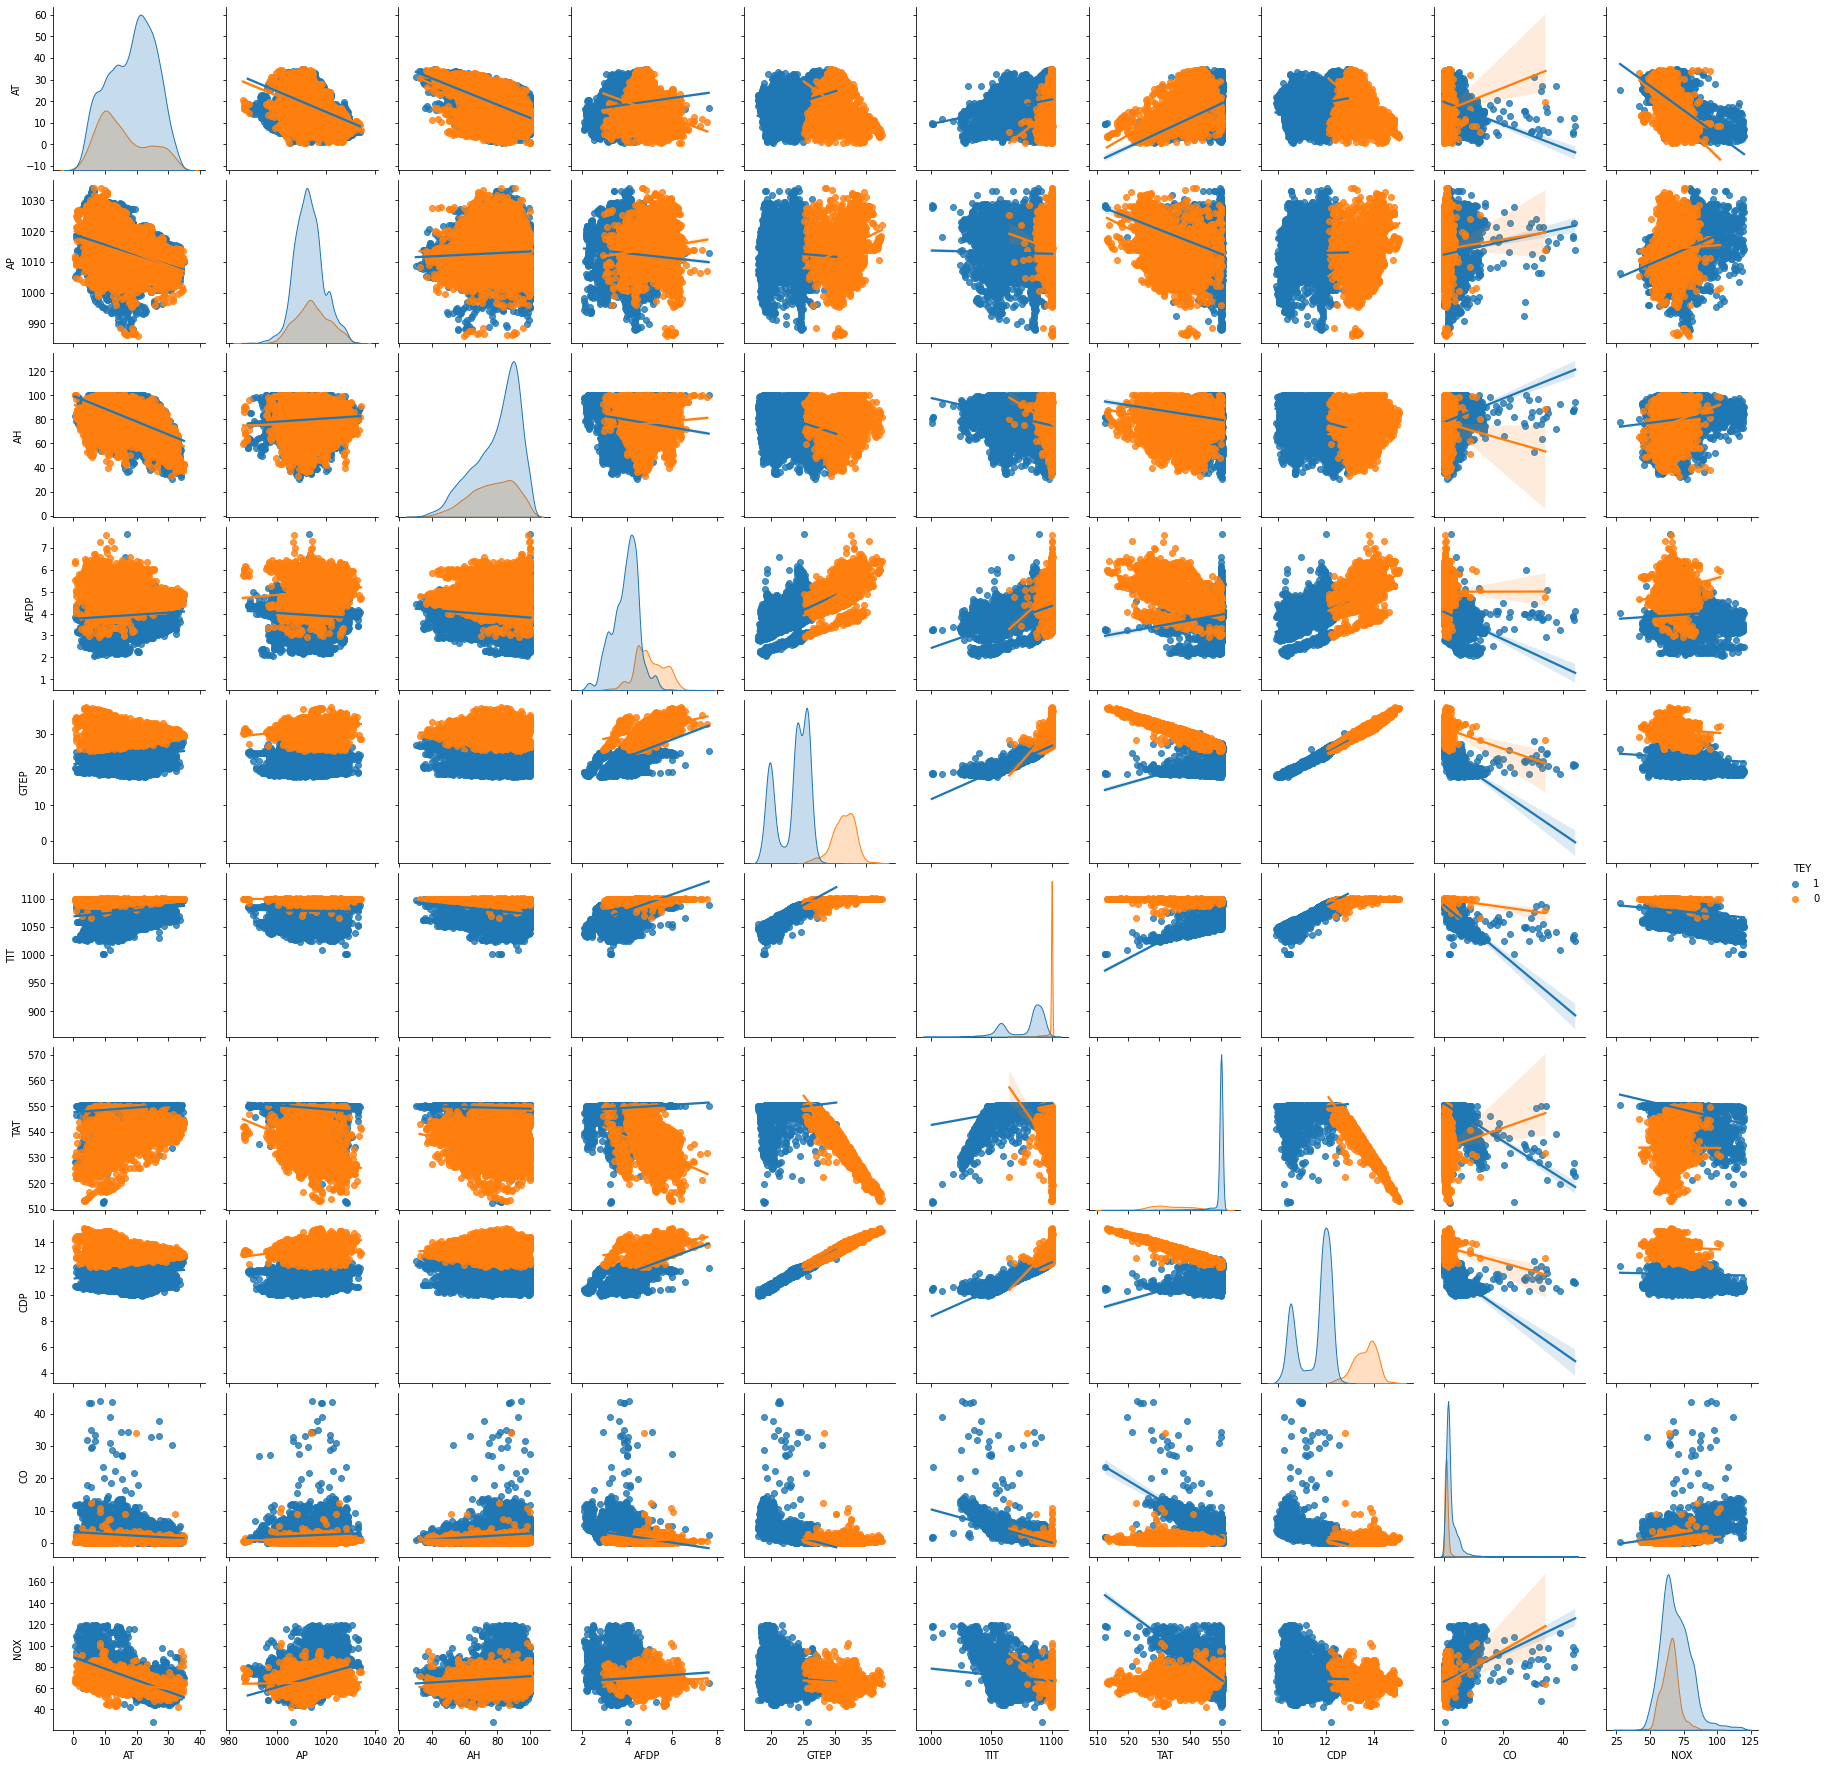

In [28]:
sns.pairplot(gas_data,x_vars=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX'], 
                     y_vars=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX'],
                     hue='TEY',
                     kind='reg',diag_kind='kde')
plt.show()

### Observations:
1. Some of the features having correltion among each other.
2. The **Compressor Discharge pressure (CDP)** has **high correlation** with **Gas Turbine Exhaust Pressure (GTEP)** which is good to generate high energy yield
3. Also, Compressor Discharge Pressure (CDP) have relation with Turbine Inlet Temperature (TIT) and Air Filter Difference Pressure (AFDP)
4. The Turbine Inlet Temperature (TIT) has correlation with Gas Turbine Exhaust Pressure (GTEP) which is good to generate high energy yield
5. And Gas Turbine Exhaust Pressure (GTEP) has correlation with Air Filter Difference Pressure (AFDP)

### Scatter Plot

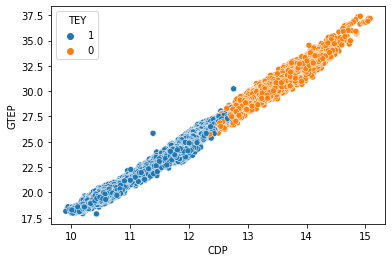

In [29]:
sns.scatterplot(x='CDP',y='GTEP',data=gas_data,hue='TEY')
plt.show()

### Observations:

1. The **Compressor Discharge Pressure (CDP)** has **Positive Correlation** with **Gas Turbine Exhaust Pressure (GTEP)** which is good to generate high energy yield
2. As the CDP is increasing the GTEP increases
3. Both the features are important while generating the Turbin Energy
4. It has an upward trend which is good, High Turbine Energy is getting produced as both the features are increasing

### Scatter Plot

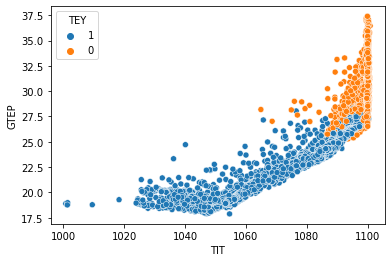

In [30]:
sns.scatterplot(x='TIT',y='GTEP',data=gas_data,hue='TEY')
plt.show()

### Observations:

1. The **Turbine Inlet Temperature (TIT)** has **Positive Correlation** with **Gas Turbine Exhaust Pressure (GTEP)** which is good to generate High Energy Yield
2. As the GTEP is increasing, the TIT also increasing
3. Both the features are important while generating the Turbine Energy
4. It has an upward trend which is good, the High Turbine Energy is getting produced as both the features are increasing
5. As the GTEP got increased the Turbine Energy is getting changed from Small to High which is good in production of energy.

## Correlation Matrix

In [31]:
cor = gas_data.corr()
cor

,TEY,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
TEY,1.000000,0.152233,-0.091791,0.099344,-0.606499,-0.828028,-0.550896,0.860942,-0.814787,0.282861,0.179066
AT,0.152233,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.100705,-0.088588,-0.600006
AP,-0.091791,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.131198,0.041614,0.256744
AH,0.099344,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.182010,0.165505,0.143061
AFDP,-0.606499,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.727152,-0.334207,-0.037299
GTEP,-0.828028,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.993784,-0.508259,-0.208496
TIT,-0.550896,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.887238,-0.688272,-0.231636
TAT,0.860942,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.744740,0.063404,0.009888
CDP,-0.814787,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,1.000000,-0.520783,-0.169103
CO,0.282861,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.520783,1.000000,0.316743


### Heatmap
- Having a visual at Correlation Matrix

<Axes: >

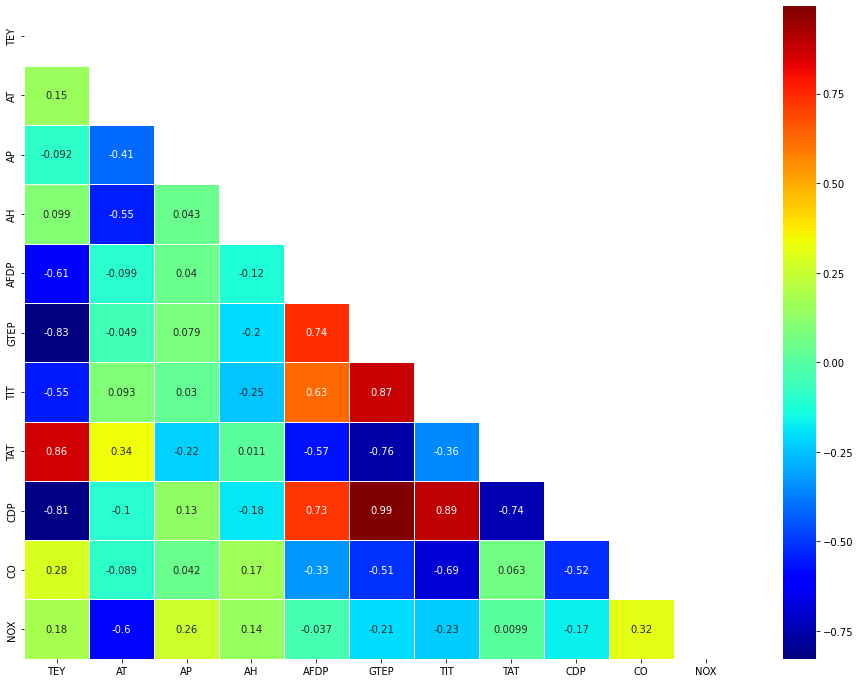

In [33]:
plt.figure(figsize=(16,12))
mask = np.zeros_like(gas_data.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=gas_data.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

In [34]:
x = gas.drop('TEY', axis=1)
y = gas_data[["TEY"]]

## Feature Engineering
- ### Univariate Feature Selection
#### Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)

In [35]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split

In [36]:
#Feature extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)

In [37]:
#Summarize scores
scores = fit.scores_
features = fit.transform(x)

In [38]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,0.537778,CDP
4,0.527630,GTEP
5,0.485972,TIT
6,0.447518,TAT
3,0.244243,AFDP
8,0.138035,CO
9,0.056086,NOX
0,0.031107,AT
1,0.010978,AP
2,0.003031,AH


### Barplot

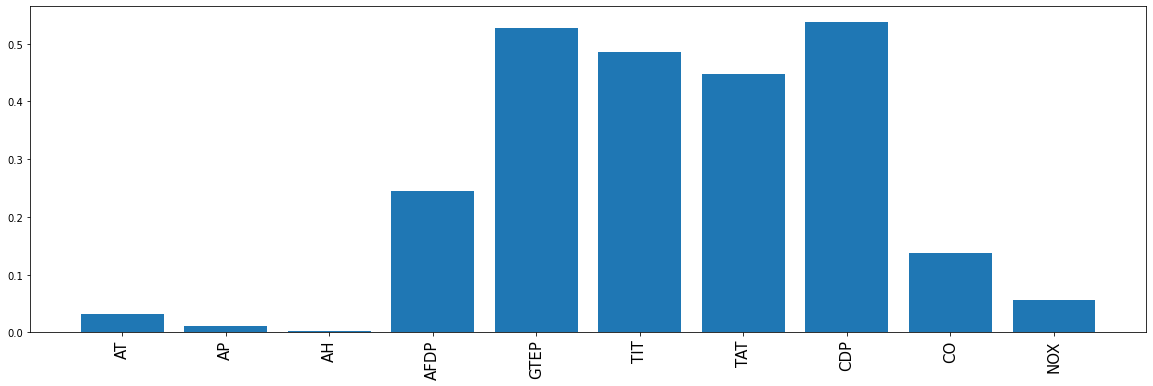

In [39]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

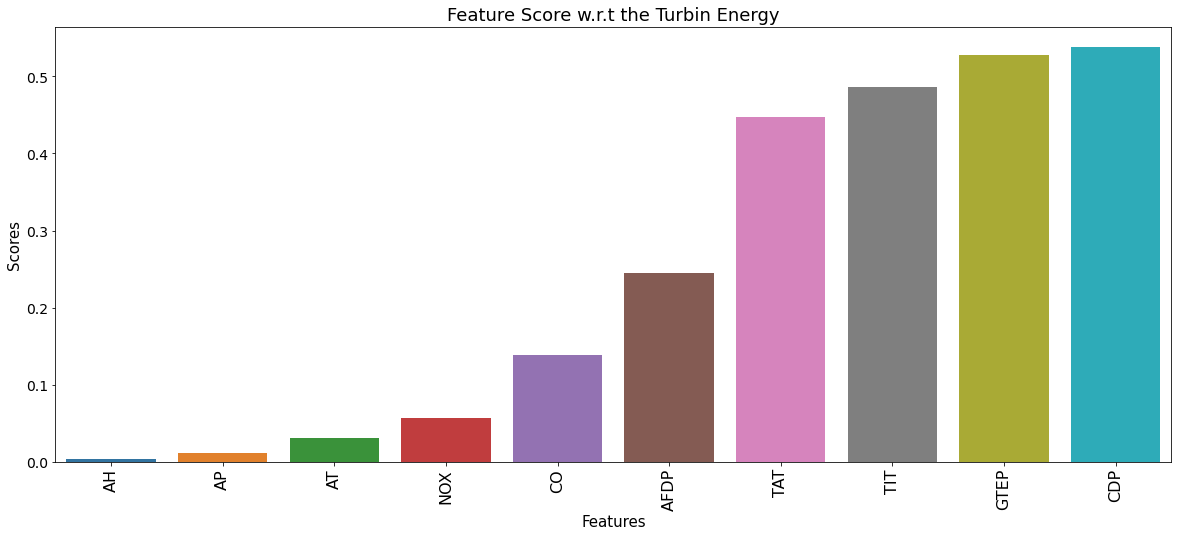

In [40]:
plt.figure(figsize=(20,8))

#Make barplot and sort bars
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
#Set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Turbin Energy", size=18)
plt.show()

### Observations:

1. The features such as **Compressor Discharge Pressure (CDP), Gas Turbine Exhaust Pressure (GTEP), Turbine Inlet Temperature (TIT) & Turbine After Temperature (TAT)** has **high scores** which indicates **high importance** in the dataset.


2. While, features like **Ambient Temperature (AT), Ambient Pressure (AP), Ambient Humidity (AH), Nitrogen Oxides (NOx)** has **low score** which shows **low impotance** in the dataset. 
<br>

- ### Recursive Feature Elimination

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [42]:
#Feature extraction
model = LogisticRegression(max_iter=400)
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(x,y)

In [43]:
#Feature Ranking:
fit.ranking_

array([1, 5, 7, 4, 1, 3, 2, 1, 6, 8])

In [44]:
from sklearn.preprocessing import StandardScaler

###  Standardization

In [45]:
a = StandardScaler()
a.fit(x)
X_standardized = a.transform(x)

In [46]:
X_standardized

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [47]:
y

,TEY
0,1
1,1
2,1
3,1
4,1
...,...
15034,1
15035,1
15036,1
15037,1


## Splitting data into Test & Train Data

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=3)

In [49]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((10527, 10), (4512, 10), (10527, 1), (4512, 1))

## Tensorflow - Keras

- ### The `tensorflow` package is an open-source machine learning framework that is widely used for building and training deep learning models. The `keras` package is a high-level neural networks API that is built on top of tensorflow and provides an easy-to-use interface for building and training deep learning models.

- ### Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear and actionable feedback upon user error.

In [50]:
!pip install tensorflow
!pip install keras

In [51]:
#Importing the necessary packages
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.optimizers import adam_v2

## Tuning of Hyperparameters : Batch Size and Epochs

- The batch size is a number of samples processed before the model is updated. 
- The number of epochs is the number of complete passes through the training dataset. 
- The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.

In [52]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(20,input_dim=10,activation='relu'))
    model1.add(Dense(8,activation='relu'))
    model1.add(Dense(4,activation="relu"))
    model1.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(learning_rate=0.001)
    model1.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model1

In [53]:
model1 =KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(2),verbose=10)

In [54]:
grid_result = grid.fit(x_test,y_test)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2; 1/16] START batch_size=10, epochs=10...................................
[CV 1/2; 1/16] END ....batch_size=10, epochs=10;, score=0.994 total time=   6.9s
[CV 2/2; 1/16] START batch_size=10, epochs=10...................................
[CV 2/2; 1/16] END ....batch_size=10, epochs=10;, score=0.994 total time=   4.8s
[CV 1/2; 2/16] START batch_size=10, epochs=50...................................
[CV 1/2; 2/16] END ....batch_size=10, epochs=50;, score=0.995 total time=  20.6s
[CV 2/2; 2/16] START batch_size=10, epochs=50...................................
[CV 2/2; 2/16] END ....batch_size=10, epochs=50;, score=0.995 total time=  21.9s
[CV 1/2; 3/16] START batch_size=10, epochs=100..................................
[CV 1/2; 3/16] END ...batch_size=10, epochs=100;, score=0.995 total time=  41.5s
[CV 2/2; 3/16] START batch_size=10, epochs=100..................................
[CV 2/2; 3/16] END ...batch_size=10, epochs=100;

In [55]:
#Summarize the results
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9953457415103912, using {'batch_size': 40, 'epochs': 200}
0.9942376017570496,0.0 with {'batch_size': 10, 'epochs': 10}
0.995124101638794,0.0 with {'batch_size': 10, 'epochs': 50}
0.995124101638794,0.0 with {'batch_size': 10, 'epochs': 100}
0.9944592118263245,0.0011081695556640625 with {'batch_size': 10, 'epochs': 200}
0.9931294322013855,0.0006648898124694824 with {'batch_size': 20, 'epochs': 10}
0.9935726821422577,0.0011081397533416748 with {'batch_size': 20, 'epochs': 50}
0.9942376017570496,0.0 with {'batch_size': 20, 'epochs': 100}
0.9944592118263245,0.0006648898124694824 with {'batch_size': 20, 'epochs': 200}
0.9929078221321106,0.0 with {'batch_size': 40, 'epochs': 10}
0.9940159320831299,0.0006648898124694824 with {'batch_size': 40, 'epochs': 50}
0.9942376017570496,0.0 with {'batch_size': 40, 'epochs': 100}
0.9953457415103912,0.0006649196147918701 with {'batch_size': 40, 'epochs': 200}
0.990026593208313,0.00022161006927490234 with {'batch_size': 50, 'epochs': 10}
0.9940159618

## Tuning of Hyperparameters : Learning rate and Drop out rate

- **Learning rate dropout (LRD)** is a new gradient descent technique to motivate faster convergence and better generalization. 
- LRD aids the optimizer to actively explore in the parameter space by randomly dropping some learning rates (to 0); at each iteration, only parameters whose learning rate is not 0 are updated.

In [56]:
#Defining the model

def create_model(dropout_rate,learning_rate):
    model2 = Sequential()
    model2.add(Dense(12,input_dim=10,activation='relu'))
    model2.add(Dense(8,activation='relu'))
    model2.add(Dense(4,activation="relu"))
    model2.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(lr=0.001)
    model2.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model2

In [57]:
model2=KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
learning_rate = [0.001,0.01,0.1]
param_grid=dict(dropout_rate=dropout_rate,learning_rate = learning_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(2),verbose=10)

In [58]:
grid_result2 = grid2.fit(x_test,y_test)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV 1/2; 1/18] START dropout_rate=0.0, learning_rate=0.001......................
[CV 1/2; 1/18] END dropout_rate=0.0, learning_rate=0.001;, score=0.996 total time=  40.1s
[CV 2/2; 1/18] START dropout_rate=0.0, learning_rate=0.001......................
[CV 2/2; 1/18] END dropout_rate=0.0, learning_rate=0.001;, score=0.993 total time=  45.2s
[CV 1/2; 2/18] START dropout_rate=0.0, learning_rate=0.01.......................
[CV 1/2; 2/18] END dropout_rate=0.0, learning_rate=0.01;, score=0.995 total time=  42.8s
[CV 2/2; 2/18] START dropout_rate=0.0, learning_rate=0.01.......................
[CV 2/2; 2/18] END dropout_rate=0.0, learning_rate=0.01;, score=0.995 total time=  37.3s
[CV 1/2; 3/18] START dropout_rate=0.0, learning_rate=0.1........................
[CV 1/2; 3/18] END dropout_rate=0.0, learning_rate=0.1;, score=0.995 total time=  40.5s
[CV 2/2; 3/18] START dropout_rate=0.0, learning_rate=0.1........................
[CV 2/2

In [59]:
#Summarize the results
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9957889914512634, using {'dropout_rate': 0.4, 'learning_rate': 0.001}
0.9942376017570496,0.0013297796249389648 with {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.995124101638794,0.0 with {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9942375719547272,0.0008865296840667725 with {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9933510720729828,0.0004432499408721924 with {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9935726821422577,0.00022163987159729004 with {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9946808516979218,0.0013298094272613525 with {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9940159320831299,0.0006648898124694824 with {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.995124101638794,0.0 with {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.9933510720729828,0.0017730295658111572 with {'dropout_rate': 0.2, 'learning_rate': 0.1}
0.994902491569519,0.0006648898124694824 with {'dropout_rate': 0.3, 'learning_rate': 0.001}
0.993794322013855,0.0008864998817443848 with {'dro

## Tuning of Hyperparameters : Activation Function and Kernel Initializer

- The **Activation Function** compares the input value to a threshold value. 
- If the input value is greater than the threshold value, the neuron is activated. 
- **Kernel Initializers** are also known as **Weight Initializers** as their main task is to initialize the weights of a neural network

In [60]:
#Defining the model

def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(12,input_dim=10,activation='relu'))
    model3.add(Dropout(0.01))
    model3.add(Dense(8,activation='relu'))
    model3.add(Dropout(0.01))
    model3.add(Dense(4,activation="relu"))
    model3.add(Dropout(0.01))
    model3.add(Dense(units=1,activation="sigmoid"))
    
    adam=Adam(lr=0.001)
    model3.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model3


In [61]:
#Create the model

model3=KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(2),verbose=10)

In [62]:
grid_result3 = grid3.fit(x_test,y_test)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2; 1/9] START activation_function=softmax, init=normal....................
[CV 1/2; 1/9] END activation_function=softmax, init=normal;, score=0.995 total time=  43.1s
[CV 2/2; 1/9] START activation_function=softmax, init=normal....................
[CV 2/2; 1/9] END activation_function=softmax, init=normal;, score=0.993 total time=  42.0s
[CV 1/2; 2/9] START activation_function=softmax, init=uniform...................
[CV 1/2; 2/9] END activation_function=softmax, init=uniform;, score=0.996 total time=  40.2s
[CV 2/2; 2/9] START activation_function=softmax, init=uniform...................
[CV 2/2; 2/9] END activation_function=softmax, init=uniform;, score=0.995 total time=  43.2s
[CV 1/2; 3/9] START activation_function=softmax, init=zero......................
[CV 1/2; 3/9] END activation_function=softmax, init=zero;, score=0.995 total time=  42.0s
[CV 2/2; 3/9] START activation_function=softmax, init=zero.................

In [63]:
#Summarize the results
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9957889914512634, using {'activation_function': 'softmax', 'init': 'uniform'}
0.9940159618854523,0.0011081397533416748 with {'activation_function': 'softmax', 'init': 'normal'}
0.9957889914512634,0.0006648898124694824 with {'activation_function': 'softmax', 'init': 'uniform'}
0.993794322013855,0.0008864998817443848 with {'activation_function': 'softmax', 'init': 'zero'}
0.9957889914512634,0.0006648898124694824 with {'activation_function': 'tanh', 'init': 'normal'}
0.9933510422706604,0.0 with {'activation_function': 'tanh', 'init': 'uniform'}
0.9935727119445801,0.0006648898124694824 with {'activation_function': 'tanh', 'init': 'zero'}
0.9944592118263245,0.0011081695556640625 with {'activation_function': 'relu', 'init': 'normal'}
0.995124101638794,0.0 with {'activation_function': 'relu', 'init': 'uniform'}
0.9940159320831299,0.0006648898124694824 with {'activation_function': 'relu', 'init': 'zero'}


## Tuning of Hyperparameter : Number of Neurons in activation layer

- The number of neurons range is set to be from 10 to 100. 
- An activation function is a parameter in each layer. Input data are fed to the input layer, followed by hidden layers, and the final output layer

In [64]:
#Defining the model

def create_model(neuron1,neuron2):
    model4 = Sequential()
    model4.add(Dense(neuron1,input_dim = 10,kernel_initializer = 'uniform',activation = 'linear'))
    model4.add(Dropout(0.2))
    model4.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model4.add(Dropout(0.2))
    model4.add(Dense(1,activation = 'sigmoid'))
    
    adam = adam_v2.Adam(lr = 0.001)
    model4.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model4


In [65]:
#Create the model

model4=KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
neuron1 = [8,16,24]
neuron2 = [4,8,16]
param_grid=dict(neuron1 = neuron1,neuron2 = neuron2)
grid4 = GridSearchCV(estimator=model4,param_grid=param_grid,cv=KFold(2),verbose=10)


In [66]:
grid_result4 = grid4.fit(x_test,y_test)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2; 1/9] START neuron1=8, neuron2=4........................................
[CV 1/2; 1/9] END .........neuron1=8, neuron2=4;, score=0.994 total time=  43.4s
[CV 2/2; 1/9] START neuron1=8, neuron2=4........................................
[CV 2/2; 1/9] END .........neuron1=8, neuron2=4;, score=0.995 total time=  40.9s
[CV 1/2; 2/9] START neuron1=8, neuron2=8........................................
[CV 1/2; 2/9] END .........neuron1=8, neuron2=8;, score=0.994 total time=  38.8s
[CV 2/2; 2/9] START neuron1=8, neuron2=8........................................
[CV 2/2; 2/9] END .........neuron1=8, neuron2=8;, score=0.995 total time=  43.5s
[CV 1/2; 3/9] START neuron1=8, neuron2=16.......................................
[CV 1/2; 3/9] END ........neuron1=8, neuron2=16;, score=0.994 total time=  46.1s
[CV 2/2; 3/9] START neuron1=8, neuron2=16.......................................
[CV 2/2; 3/9] END ........neuron1=8, neuron2=16;,

In [67]:
#Summarize the results
print('Best {}, using {}'.format(grid_result4.best_score_,grid_result4.best_params_))
means = grid_result4.cv_results_["mean_test_score"]
stds = grid_result4.cv_results_["std_test_score"]
params = grid_result4.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9949024617671967, using {'neuron1': 24, 'neuron2': 8}
0.9946808516979218,0.0004432499408721924 with {'neuron1': 8, 'neuron2': 4}
0.9944592118263245,0.0006648898124694824 with {'neuron1': 8, 'neuron2': 8}
0.9946808516979218,0.0004432499408721924 with {'neuron1': 8, 'neuron2': 16}
0.9946808516979218,0.0008865296840667725 with {'neuron1': 16, 'neuron2': 4}
0.9944592118263245,0.00022161006927490234 with {'neuron1': 16, 'neuron2': 8}
0.9942376017570496,0.0 with {'neuron1': 16, 'neuron2': 16}
0.9944592118263245,0.0006648898124694824 with {'neuron1': 24, 'neuron2': 4}
0.9949024617671967,0.00022163987159729004 with {'neuron1': 24, 'neuron2': 8}
0.9940159320831299,0.0006648898124694824 with {'neuron1': 24, 'neuron2': 16}


In [68]:
def toFindBestParams(x_train, y_train, x_test, y_test):

    
    #Defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
           
    #Initializing the trials
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            #Create ANN model
            model = Sequential()
            #Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))
            
            #Defining the Second layer of the model
            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
 
            #The output neuron is a single fully connected node 
            #Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
            #Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])
 
            #Fitting the ANN to the Training set
            model_trained = model.fit(x_train, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)
               
             #Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]   
            
            #Printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

#Calling the function
toFindBestParams(x_train, y_train, x_test, y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.997340202331543
batch_size: 5 - epochs: 10 Accuracy: 0.997150182723999
batch_size: 5 - epochs: 50 Accuracy: 0.9978151321411133
batch_size: 5 - epochs: 100 Accuracy: 0.9981951117515564
batch_size: 10 - epochs: 5 Accuracy: 0.9969602227210999
batch_size: 10 - epochs: 10 Accuracy: 0.9979101419448853
batch_size: 10 - epochs: 50 Accuracy: 0.9981951117515564
batch_size: 10 - epochs: 100 Accuracy: 0.9987650513648987
batch_size: 15 - epochs: 5 Accuracy: 0.9969602227210999
batch_size: 15 - epochs: 10 Accuracy: 0.9975301623344421
batch_size: 15 - epochs: 50 Accuracy: 0.9981951117515564
batch_size: 15 - epochs: 100 Accuracy: 0.9989550709724426
batch_size: 20 - epochs: 5 Accuracy: 0.9975301623344421
batch_size: 20 - epochs: 10 Accuracy: 0.9977201223373413
batch_size: 20 - epochs: 50 Accuracy: 0.9974351525306702
batch_size: 20 - epochs: 100 Accuracy: 0.9983851313591003


## Training model with Optimum Values of Hyperparameters

- The **Hyperparameter Optimization** was carried out by taking 2 hyperparameters at once. We may have missed the best values.
- The performance can be further improved by finding the Optimum values of hyperparameters all at once given by the code snippet below.

In [69]:
#Create ANN model

model = Sequential()
model.add(Dense(4,input_dim = 10,kernel_initializer = 'normal',activation='tanh'))
model.add(Dropout(0.0))
model.add(Dense(8,kernel_initializer = 'normal',activation='tanh'))
model.add(Dropout(0.0))
# model.add(Dense(4,kernel_initializer = 'normal',activation='tanh'))
# model.add(Dropout(0.0))
model.add(Dense(units=1, kernel_initializer='normal',activation = 'sigmoid'))
    
adam = adam_v2.Adam(lr = 0.001)
model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])

In [70]:
model.summary()

Model: "sequential_124"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_461 (Dense)           (None, 4)                 44        
                                                                 
 dropout_95 (Dropout)        (None, 4)                 0         
                                                                 
 dense_462 (Dense)           (None, 8)                 40        
                                                                 
 dropout_96 (Dropout)        (None, 8)                 0         
                                                                 
 dense_463 (Dense)           (None, 1)                 9         
                                                                 
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


## Training the model with best parameters

In [71]:
history = model.fit(x_train, y_train, validation_split=0.3, batch_size = 15, epochs = 100)

Epoch 1/100
492/492 [==============================] - 1s 2ms/step - loss: 0.2556 - accuracy: 0.9631 - val_loss: 0.0497 - val_accuracy: 0.9943
Epoch 2/100
492/492 [==============================] - 1s 2ms/step - loss: 0.0338 - accuracy: 0.9931 - val_loss: 0.0244 - val_accuracy: 0.9940
Epoch 3/100
492/492 [==============================] - 1s 2ms/step - loss: 0.0191 - accuracy: 0.9950 - val_loss: 0.0192 - val_accuracy: 0.9940
Epoch 4/100
492/492 [==============================] - 1s 2ms/step - loss: 0.0145 - accuracy: 0.9957 - val_loss: 0.0153 - val_accuracy: 0.9946
Epoch 5/100
492/492 [==============================] - 1s 2ms/step - loss: 0.0122 - accuracy: 0.9969 - val_loss: 0.0139 - val_accuracy: 0.9946
Epoch 6/100
492/492 [==============================] - 1s 1ms/step - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.0117 - val_accuracy: 0.9956
Epoch 7/100
492/492 [==============================] - 1s 1ms/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.0106 - val_accuracy: 0.9956

Epoch 58/100
492/492 [==============================] - 1s 1ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0143 - val_accuracy: 0.9965
Epoch 59/100
492/492 [==============================] - 1s 1ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.0136 - val_accuracy: 0.9972
Epoch 60/100
492/492 [==============================] - 1s 1ms/step - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.0111 - val_accuracy: 0.9959
Epoch 61/100
492/492 [==============================] - 1s 1ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0113 - val_accuracy: 0.9965
Epoch 62/100
492/492 [==============================] - 1s 1ms/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 0.0125 - val_accuracy: 0.9965
Epoch 63/100
492/492 [==============================] - 1s 2ms/step - loss: 0.0044 - accuracy: 0.9984 - val_loss: 0.0137 - val_accuracy: 0.9962
Epoch 64/100
492/492 [==============================] - 1s 1ms/step - loss: 0.0046 - accuracy: 0.9982 - val_loss: 0.0135 - val_accuracy:

In [72]:
model.weights

[<tf.Variable 'dense_461/kernel:0' shape=(10, 4) dtype=float32, numpy=
 array([[ 0.58667   , -0.5694122 , -0.42218354,  0.258026  ],
        [-0.02400941,  0.03335824, -0.09059012,  0.02233757],
        [-0.05496754,  0.04803972, -0.10236895,  0.2520138 ],
        [ 0.04293754, -0.01427697, -0.04193438, -0.13456306],
        [-0.5410637 ,  0.54569757,  0.5647277 , -0.81114054],
        [-0.56481004,  0.46599874,  0.6210632 , -0.8370854 ],
        [ 0.07147583, -0.03380395, -0.02741798,  0.05321962],
        [-0.57609075,  0.6099897 ,  0.6018104 , -0.75663203],
        [-0.05019202,  0.04499939,  0.00645169, -0.21850939],
        [ 0.14030932, -0.18474263, -0.05737929,  0.04347973]],
       dtype=float32)>,
 <tf.Variable 'dense_461/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.5914956 , -0.5679323 , -0.5129501 ,  0.44819948], dtype=float32)>,
 <tf.Variable 'dense_462/kernel:0' shape=(4, 8) dtype=float32, numpy=
 array([[-0.9143654 , -0.72111815, -0.86382437,  0.7401917 ,  0.75226474

### Evaluate the model

In [73]:
scores = model.evaluate(X_standardized,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 0s 852us/step - loss: 0.0082 - accuracy: 0.9969
accuracy: 99.69%


In [74]:
#List all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

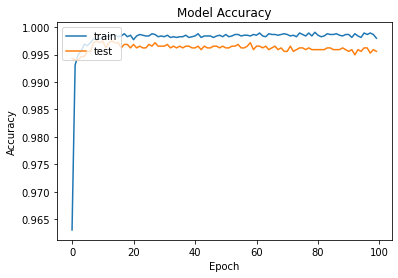

In [75]:
#Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

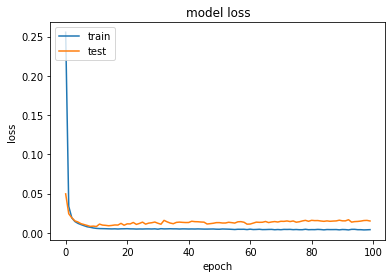

In [76]:
#Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

- The training-error converged but the testing error didn't converge and conincide with the training error.
- Hence, We can do better with Hyperparameter Tuning all the parameters which is computationally Expensive.

## Predicting values from Model using same dataset

In [77]:
#Generating predictions for test data
y_predict_test = model.predict(x_test) 

#Creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test
test_prediction['Test_Probability'] = y_predict_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

#Converting the probability of target variable to binary class of test data
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

141/141 [==============================] - 0s 731us/step
(4512, 3)


,Test_Actual,Test_Probability,Test_Predicted
8185,0,0.000012,0
8994,1,0.999960,1
8944,0,0.000012,0
3451,1,0.999992,1
8236,1,0.999986,1
3508,1,0.999906,1
6768,1,0.999984,1
11903,0,0.000032,0
9257,0,0.000012,0
2911,1,0.999983,1


In [78]:
#Generating predictions for train data
y_predict_train = model.predict(x_train)

#Creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction.head(10)

329/329 [==============================] - 0s 717us/step
(10527, 3)


,Train_Actual,Train_Probability,Train_Predicted
13383,1,0.999941,1
13172,1,0.999988,1
8356,1,0.999989,1
2683,0,0.000013,0
3266,1,0.999967,1
2371,0,0.000013,0
907,1,0.993511,1
3713,1,0.999992,1
762,1,0.999992,1
7029,1,0.999988,1


## Classification Report
### Test Data

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Classification Report for Test Data  =\n", classification_report(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))

Classification Report for Test Data  =
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1170
           1       1.00      1.00      1.00      3342

    accuracy                           0.99      4512
   macro avg       0.99      0.99      0.99      4512
weighted avg       0.99      0.99      0.99      4512



### Train Data

In [80]:
print("Classification Report for Train Data  =\n", classification_report(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))

Classification Report for Train Data  =
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2645
           1       1.00      1.00      1.00      7882

    accuracy                           1.00     10527
   macro avg       1.00      1.00      1.00     10527
weighted avg       1.00      1.00      1.00     10527



### Training & Test Dataset - Scores

In [81]:
y_predict_test = model.predict(x_test) 
y_predict_train = model.predict(x_train)
print('Training set score: {:.2f}%'.format(accuracy_score(train_prediction['Train_Actual'], train_prediction['Train_Predicted'])*100))

print('Test set score: {:.2f}%'.format(accuracy_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])*100))

329/329 [==============================] - 0s 716us/step
Training set score: 99.78%
Test set score: 99.49%


## Insights:

- We have predicted Turbine Energy Yield (TEY) using ambient variables as features
- The most important features where **Air Filter Difference Pressure (AFDP), Gas Turbine Exhaust Pressure (GTEP), Turbine Inlet Temperature (TIT)** which can be used to produce high turbine energy 
- We got the **loss: 0.0084 and accuracy: 0.9972** after evaluating the model which is good enough though the loss is too low
- We have used **Model Validation Techniques, Feature Engineering**
- We have done **Optimization** for getting more accuracy
- First we tuned hyperparameters separately for checking which are the best scores and best parameters
- Then, at the final we trained model with Optimum Values of Hyperparameters
- We got the **Train Accuracy :  99.76%** and **Test Accuracy : 99.62%**